In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
data = pd.read_csv(r"C:\Users\Chaitra\Desktop\DS\Regression\Multiple Linear Regression\dataset\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [96]:
data.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [97]:
data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [98]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [99]:
data.drop([122],inplace=True)

In [100]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [101]:
data.reset_index(inplace=True)

In [102]:
data[data.isna().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
166,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [103]:
data.loc[122,:]

index                  123
day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 122, dtype: object

In [104]:
data.loc[[121,122,123,124]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [105]:
data.drop([122],inplace=True)

In [106]:
data.reset_index()

,level_0,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,240,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,241,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,242,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,243,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [107]:
data.dtypes

index           int64
day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [108]:
data.drop(columns=['index'],axis=1,inplace=True)

In [109]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [110]:
data.shape

(244, 14)

In [111]:
data.iloc[[122,123,124]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
125,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [112]:
data.dropna(inplace=True)

In [113]:
data.columns #Rain has whitespaces, so stripping the whitespace

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [114]:
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.5+ KB


In [116]:
## Change the required columns as int data types

In [117]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [118]:
data[['day','month','year','Temperature','RH','Ws']] = data[['day','month','year','Temperature','RH','Ws']].astype(int)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: int32(6), object(8)
memory usage: 22.8+ KB


In [120]:
## Change the required columns as float data types

In [121]:
O_objects = [features for features in data.columns if data[features].dtypes=='O']

In [122]:
for i in O_objects:
    if i=='Classes':
        continue
    else:
        data[i] = data[i].astype(float)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 22.8+ KB


In [124]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [125]:
data.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# EDA

In [126]:
#dropping day, month and year

In [127]:
df = data.drop(['day','month','year'],axis=1)

In [128]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [129]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [130]:
df['Classes'] = df['Classes'].str.strip()

In [131]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [132]:
df['Classes'] = np.where(df['Classes']=='not fire',0,1)

In [133]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [134]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

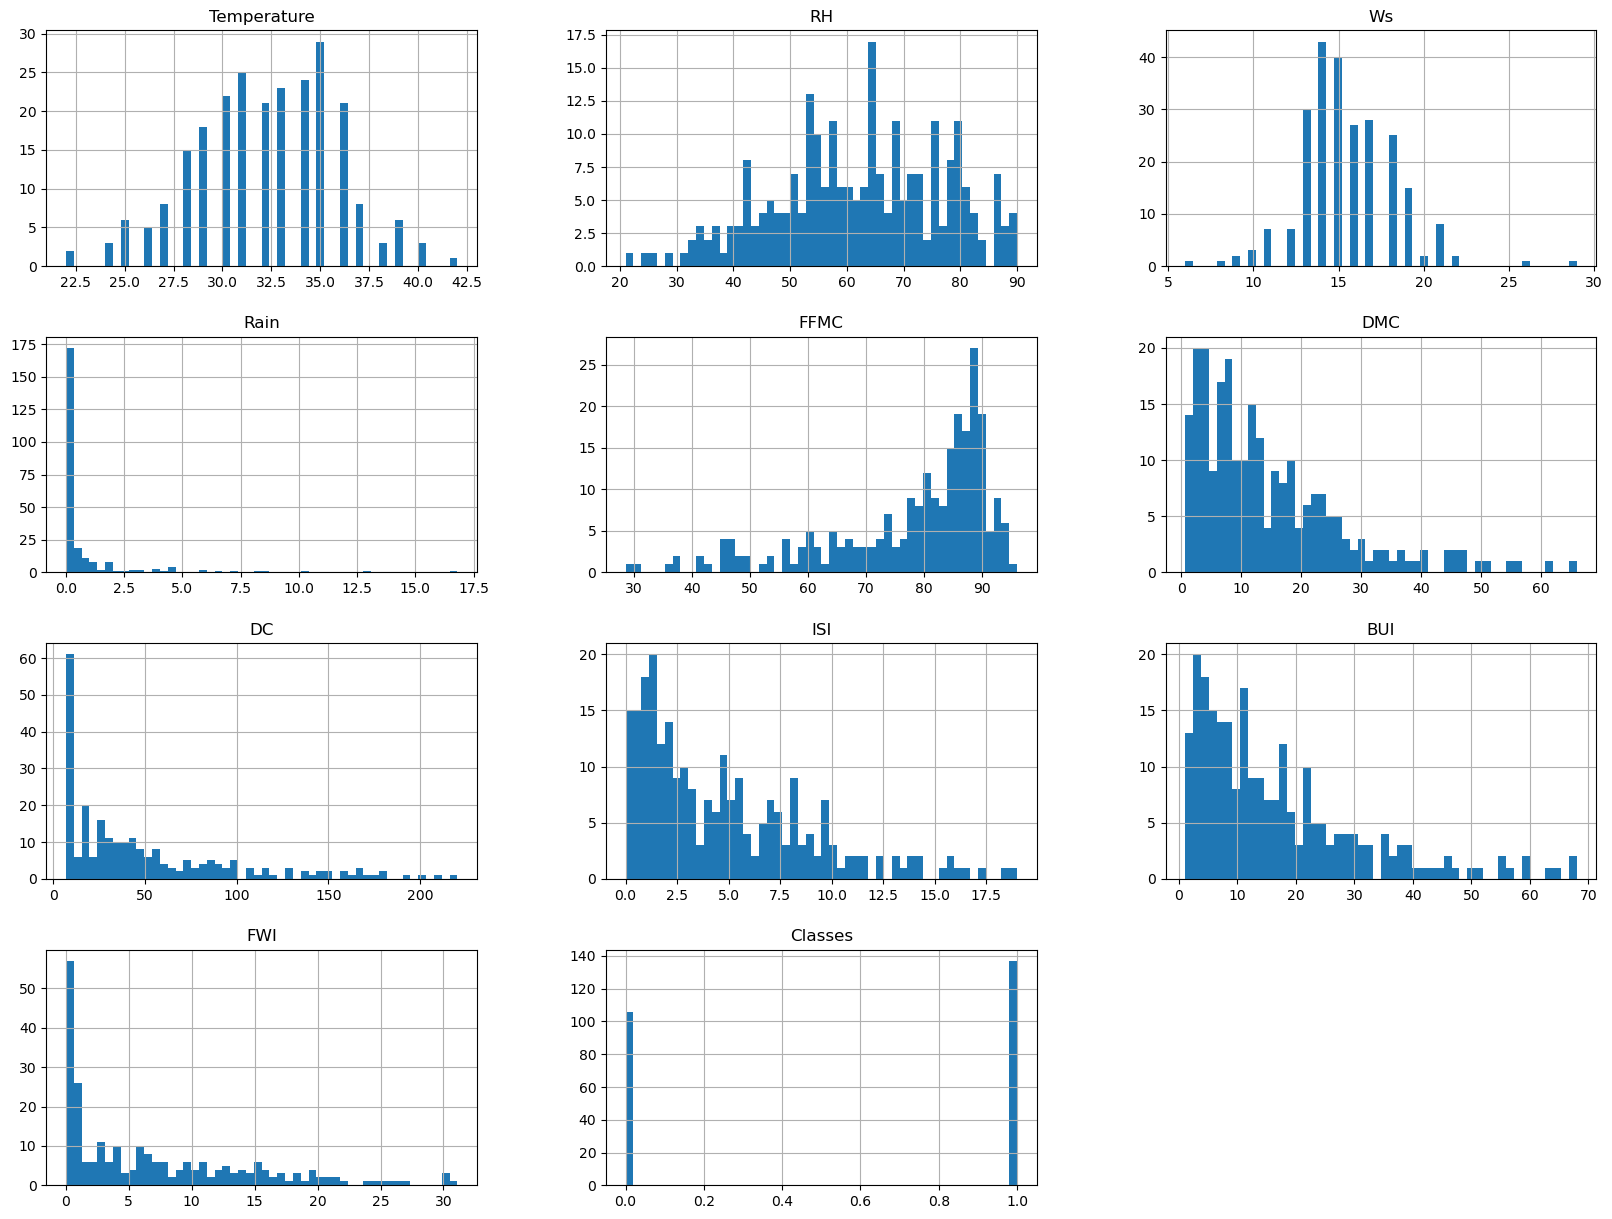

In [135]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [136]:
percentage = df['Classes'].value_counts(normalize=True)*100

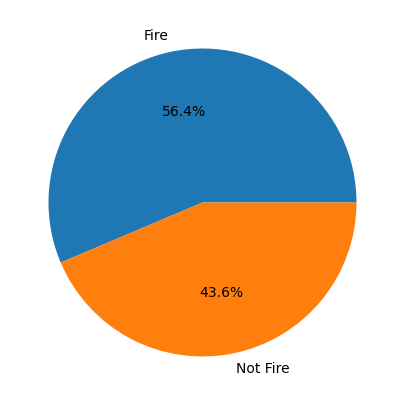

In [137]:
classlables = ['Fire','Not Fire']
plt.figure(figsize=(10,5))
plt.pie(percentage, labels=classlables,autopct='%1.1f%%')
plt.show()

In [138]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


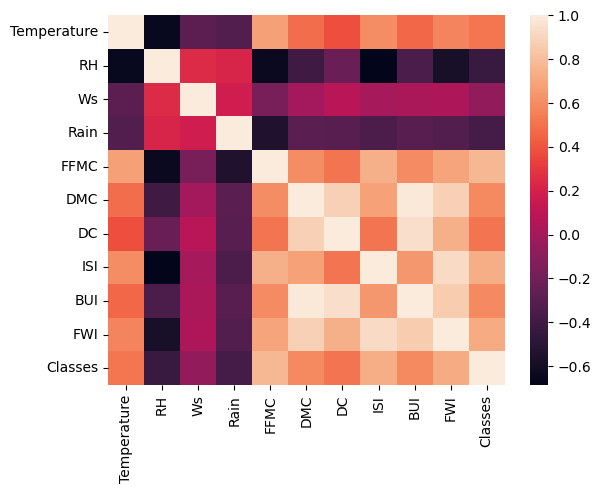

In [139]:
sns.heatmap(df.corr())
plt.show()

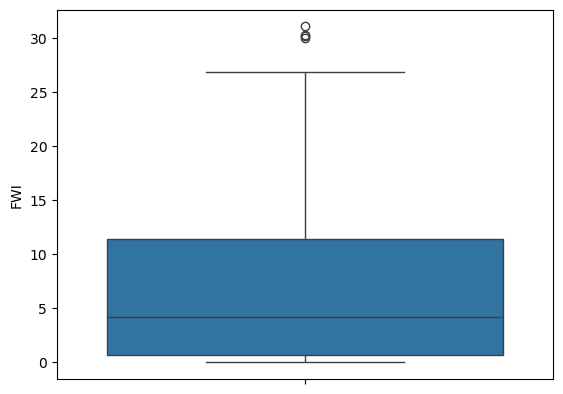

In [140]:
sns.boxplot(df['FWI'])
plt.show()

In [141]:
df.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0


In [142]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [143]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [144]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
240    6.5
241    0.0
242    0.2
243    0.7
244    0.5
Name: FWI, Length: 243, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [147]:
X_train.shape , X_test.shape

((182, 10), (61, 10))

In [148]:
y_train.shape , y_test.shape

((182,), (61,))

## Feature selection based on correlation

In [149]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000


In [150]:
## Check for multicollinearity

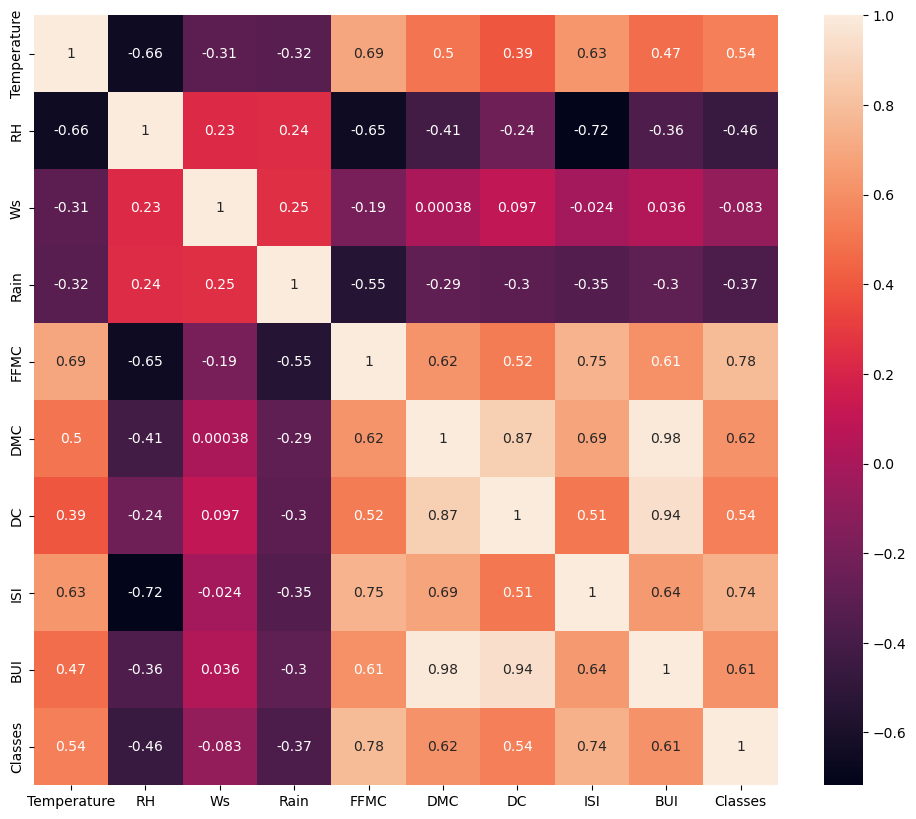

In [151]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [152]:
# dropping BUI and DC as they are multicollinear more than 85%

In [153]:
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

X_train.shape , X_test.shape

((182, 8), (61, 8))

## Feature Scaling or Standardization

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()

In [156]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.88272888,
        -0.62963326, -1.10431526],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.86687565,
        -0.93058524, -1.10431526],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.61540157,
         2.7271388 ,  0.90553851],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06504105,
        -1.06948615, -1.10431526],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.37760309,
         0.5973248 ,  0.90553851],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.01748135,
        -0.86113478, -1.10431526]])

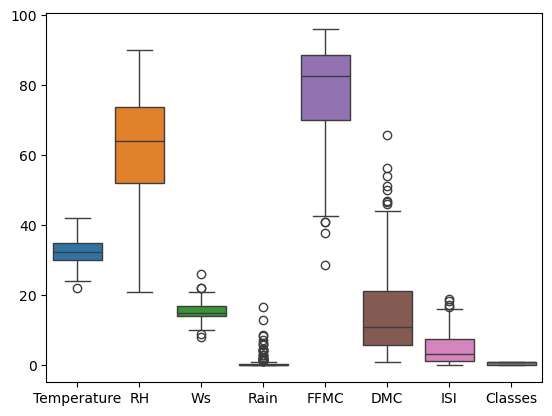

In [158]:
sns.boxplot(data=X_train)
plt.show()

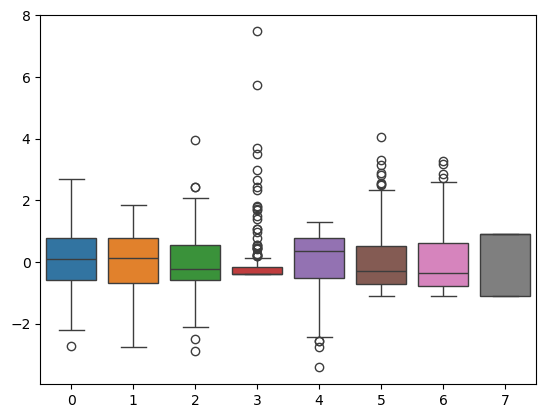

In [159]:
sns.boxplot(data=X_train_scaled)
plt.show()

## Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [161]:
lin_reg = LinearRegression()

In [162]:
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("mae is : ",mae)
print("r2 score is : ",score)

mae is :  0.584270764570155
r2 score is :  0.9818991727411215


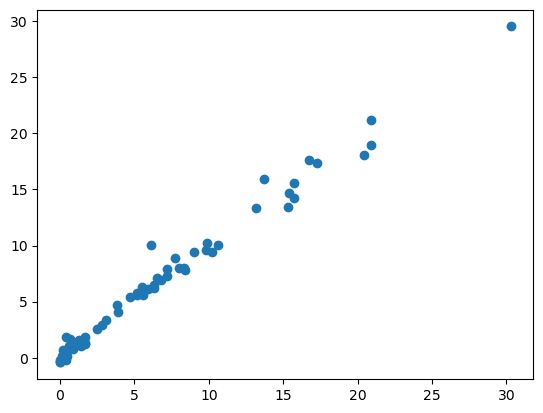

In [163]:
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression

In [164]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,r2_score

In [165]:
lasso_reg = Lasso()

In [166]:
lasso_reg.fit(X_train_scaled,y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_lasso)
score = r2_score(y_test,y_pred_lasso)

print("mae is : ",mae)
print("r2 score is : ",score)

mae is :  1.1331759949144087
r2 score is :  0.9492020263112388


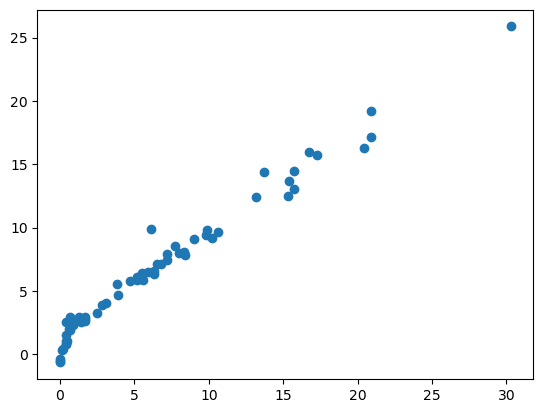

In [167]:
plt.scatter(y_test,y_pred_lasso)
plt.show()

## Lasso with Cross Validation

In [168]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred_lassocv = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_lassocv)
score = r2_score(y_test,y_pred_lassocv)

print("mae is : ",mae)
print("r2 score is : ",score)

mae is :  0.8264308494715192
r2 score is :  0.9710414687002776


In [169]:
lassocv.alpha_

0.21555730781919455

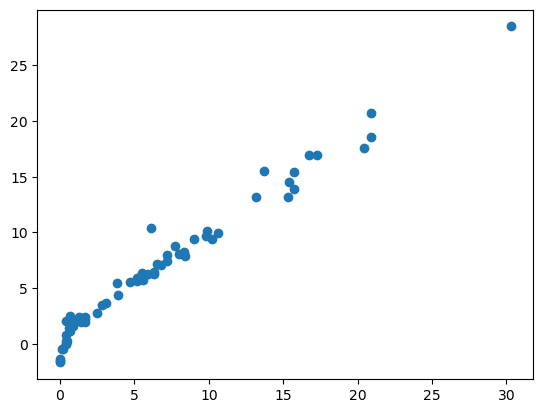

In [170]:
plt.scatter(y_test,y_pred_lassocv)
plt.show()

## Ridge Regression

In [171]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

In [172]:
Ridge_reg = Ridge()

In [173]:
Ridge_reg.fit(X_train_scaled,y_train)
y_pred_ridge = Ridge_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_ridge)
score = r2_score(y_test,y_pred_ridge)

print("mae is : ",mae)
print("r2 score is : ",score)

mae is :  0.6006561235951368
r2 score is :  0.9813046839382391


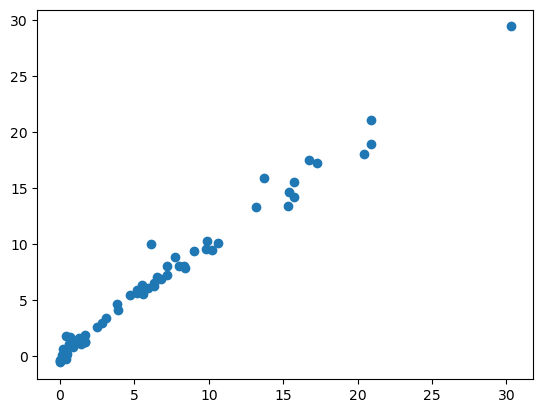

In [174]:
plt.scatter(y_test,y_pred_ridge)
plt.show()

## Elastic Net Reg

In [175]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

In [176]:
Elastic_net_reg = ElasticNet()

In [177]:
Elastic_net_reg.fit(X_train_scaled,y_train)
y_pred_elasticnet = Elastic_net_reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred_elasticnet)
score = r2_score(y_test,y_pred_elasticnet)

print("mae is : ",mae)
print("r2 score is : ",score)

mae is :  1.8822353634896
r2 score is :  0.8753460589519703


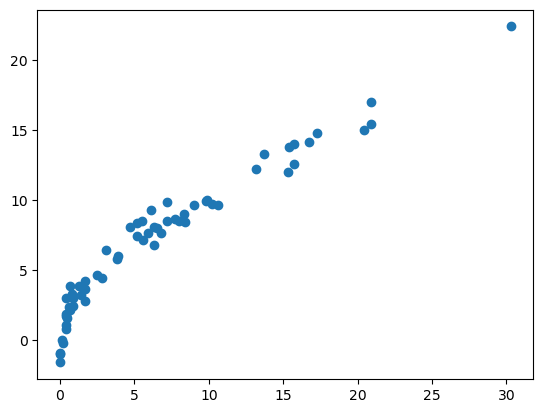

In [178]:
plt.scatter(y_test,y_pred_elasticnet)
plt.show()

## Pickle the ML Model(Ridge Regression Model) and Preprocessing model (StandardScaler model)

In [179]:
Ridge_reg

Ridge()

In [180]:
scaler

StandardScaler()

In [184]:
# Save the model

import pickle
pickle.dump(Ridge_reg,open('Model.pkl','wb'))

In [185]:
## Pickling the model file

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [183]:
print('HI')

HI
